# Azhidarov Abdusamad <br> csse1810
## Laboratory work 2. Filters and Edge detection.
1. Import libraries.
2. Read baby yoda image.
3. Read the gray scale image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv
import cv2 

In [2]:
img = cv2.imread('yoda.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

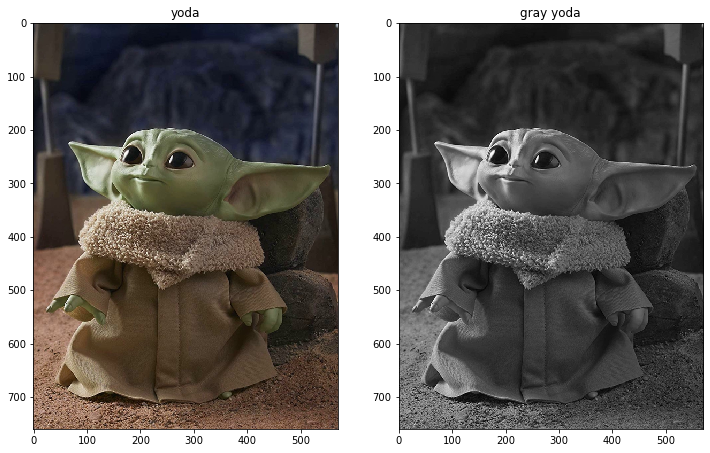

In [3]:
plt.subplots(1,2,figsize=(12,12))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("yoda")

plt.subplot(1,2,2)
plt.imshow(gray,'gray',vmin=0,vmax=255)
plt.title("gray yoda")

plt.show()

### Kernel convolution.
It is a core of Gaussian blur, Mean blur, Edge detection ans so on. Kernel convolution is a process where you take a small grid of numbers and pass them over the whole image, transforming it based on what those numbers are.
4. Create 5X5 ones matrix using numpy ones() function and divide them with 25 (5X5). This matrix will be a kernel.
5. Apply kernel as filter using Convolution. Call cv2 filter2D() function, first argument is gray scale image, second is depth, if ddepth=-1, the output image will have the same depth as the source. And third argument is kernel – convolution kernel, the matrix you created previously for x-direction.
6. Show result.

In [4]:
krnl = np.ones([5,5])
krnl = krnl/25

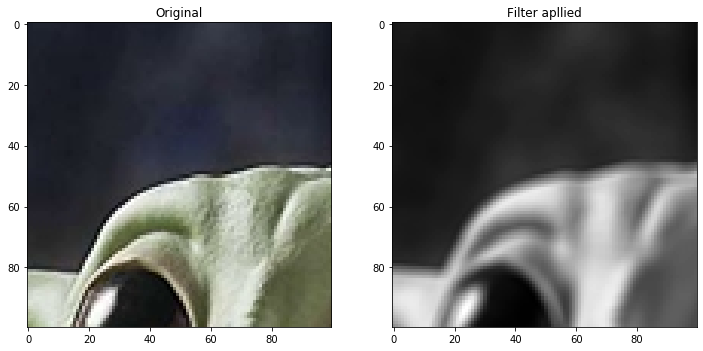

In [5]:
fltrd = cv.filter2D(gray,-1,krnl)

plt.subplots(1,2,figsize=(12,12))

plt.subplot(1,2,1) 
plt.imshow(img[150:250,150:250]) 
plt.title('Original') 

plt.subplot(1,2,2) 
plt.imshow(fltrd[150:250,150:250],cmap="gray")
plt.title('Filter apllied')

plt.show()

### Sobel edge detection.
Edge detection is simply a case of trying to find the regions in am image where we have a sharp change in intensity or a sharp change in color. Very common operator for doing this is a sobel operator, which is an approximation to a derivative of an image.It is separate in the y and x directions. Here you have to use a kernel 3 by 3 matrix, one for each x and y direction. The gradient for x-direction has minus numbers on the left and positive numbers on the right and we are preserving the center pixels.Similarly, the gradient for y-direction has minus numbers on the bottom and positive numbers on top and here we the middle row pixels.

<img src="sobel.png" width="440" height="440" align="center"/>

7. Create 3 by 3 matrices, as given above using numpy.
8. Next, create a new variable for image and initialize it by calling filter2D() function of cv2. First argument is gray scale image, second is depth, if ddepth=-1, the output image will have the same depth as the source. And third argument is kernel – convolution kernel, the matrix you created previously for x-direction. 
9. Perorm previous task again, but using second matrix for y-direction.
10. Show the filtered images.

In [6]:
Gx, Gy = np.zeros([3,3]), np.zeros([3,3])
Gx[:,0],Gx[:,2] = Gx[:,0]-1,Gx[:,2]+1
Gx[1,:,] = Gx[1,:,]*2
Gy[0,:],Gy[2:] = Gy[0,:]+1,Gy[2:]-1
Gy[:,1] = Gy[:,1]*2

print(Gx)
print(Gy)

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
[[ 1.  2.  1.]
 [ 0.  0.  0.]
 [-1. -2. -1.]]


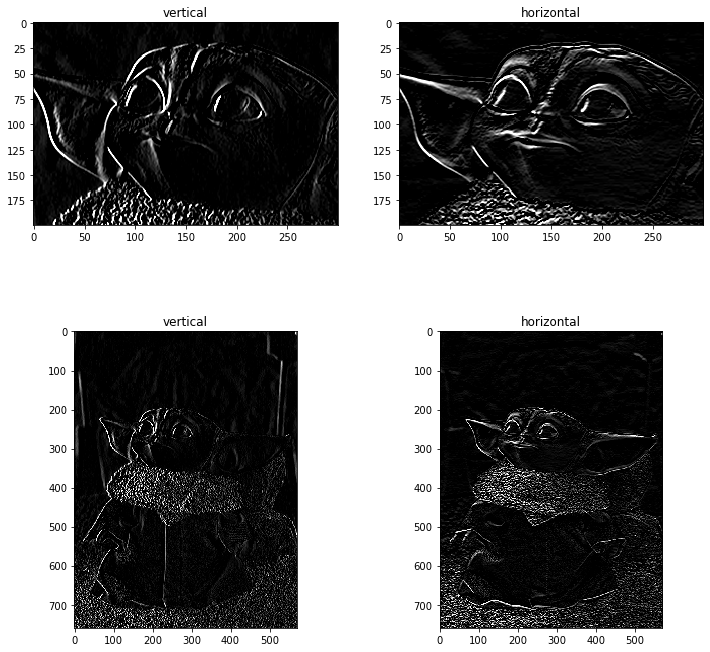

In [7]:
ver = cv.filter2D(gray,-1,Gx)
hor = cv.filter2D(gray,-1,Gy)
# [175:225,175:225]
titles = ['vertical','horizontal']
images = [ver[175:375,75:375],hor[175:375,75:375],ver,hor]
plt.subplots(2,2,figsize=(12,12))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i%2])
plt.show()

### Canny Edge Detector
11. Filter out any noise. The Gaussian filter is used for this purpose. As argument use gray scale image. 
12. Call Canny() function of cv2. As first argument is filtered image, then use two thresholds (upper and lower):
    - If a pixel gradient is higher than the upper threshold, the pixel is accepted as an edge
    - If a pixel gradient value is below the lower threshold, then it is rejected.
    - If the pixel gradient is between the two thresholds, then it will be accepted only if it is connected to a pixel that is above the upper threshold.
    - Canny recommended a upper:lower ratio between 2:1 and 3:1.
13. Show the result.

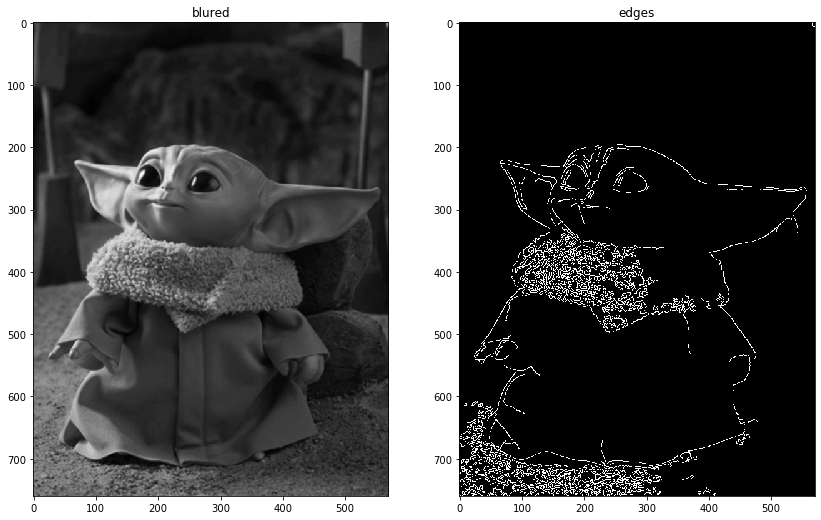

In [8]:
gray1 = cv2.GaussianBlur(gray,(11,41),1)
edge=cv.Canny(gray1,50,200)

plt.subplots(1,2,figsize=(14,14))

plt.subplot(1,2,1) 
plt.imshow(gray1,cmap="gray") 
plt.title('blured') 

plt.subplot(1,2,2) 
plt.imshow(edge,cmap="gray")
plt.title('edges')

plt.show()



14. Create a function, that takes an image as argument, and returns this changed image. You can use different filters. For example, Guassian Blur, then extract edges using Canny().
15. To capture a video, you need to create a VideoCapture object. Create a variable for webcam, initilaize it using VideoCapture() function. https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html
16. After that, you can capture frame-by-frame using read() function. 
17. Call cv2 imshow() function, which takes as first argument any string for name, and as second argument call function that you created previously (15), which takes an argument an image that webcam reads.
18. At the end, don’t forget to release the capture.

In [9]:
def giveme(img,filt="edge",isgrey=True,thr1=50,thr2=200):
    
    if(isgrey!=True):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    if(filt=="edge"):
        img=cv.Canny(cv2.GaussianBlur(img,(11,41),1),thr1,thr2)
    
    if(filt=="vert"):
        Gx = np.zeros([3,3])
        Gx[:,0],Gx[:,2] = Gx[:,0]-1,Gx[:,2]+1
        Gx[1,:,] = Gx[1,:,]*2
        img=cv.filter2D(img,-1,Gx)
    
    if(filt=="horz"):
        Gy = np.zeros([3,3])
        Gy[0,:],Gy[2:] = Gy[0,:]+1,Gy[2:]-1
        Gy[:,1] = Gy[:,1]*2
        img=cv.filter2D(img,-1,Gy)
    else:
        return img
    
    return img

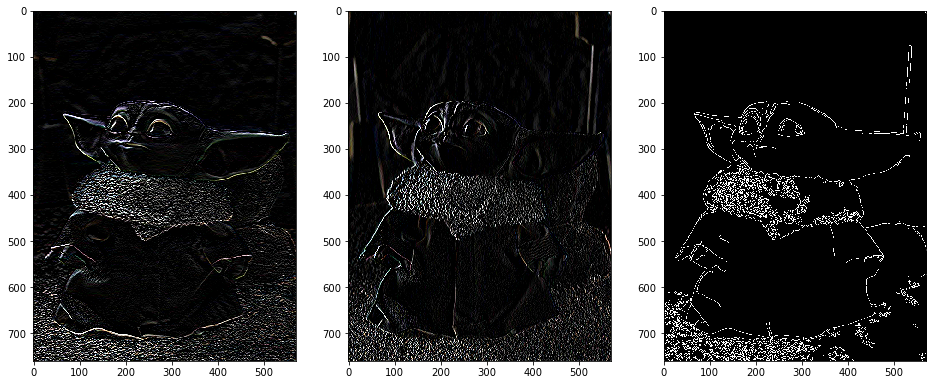

In [10]:
hr,vr,ed = giveme(img,"horz"),giveme(img,"vert"),giveme(img)
images = [hr,vr,ed]
plt.subplots(1,3,figsize=(16,16))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],'gray',vmin=0,vmax=255)
plt.show()

# Video capture

In [ ]:
cap = cv2.VideoCapture(0)
while(True):
    ret, frame = cap.read()
    
    gray = cv2.resize(frame, None, None, fx=1.7, fy=1.7)

    gray = giveme(gray,"vert",False,1,100)
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()        

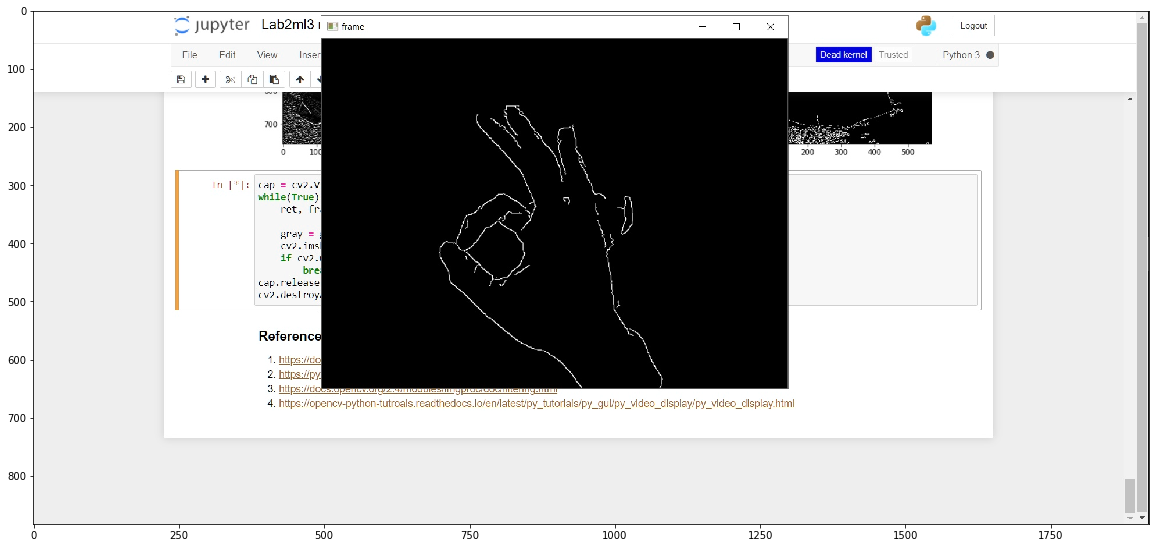

In [23]:
plt.figure(figsize=(20,20))
plt.imshow(cv2.imread('proof.jpg'))

### References
1. https://docs.opencv.org/master/d7/da8/tutorial_table_of_content_imgproc.html
2. https://pythonexamples.org/python-opencv-image-filter-convolution-cv2-filter2d/
3. https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html
4. https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html